# Домашнее задание 3 (EDA)

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
import zipfile
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px

## Получение датасета с Kaggle

### ЕСЛИ У ВАС НЕТ ФАЙЛА **kaggle.json**


>Чтобы импортировать нужный датасет, нажмите [сюда](https://www.kaggle.com/settings) и авторизуйтесь. Затем нажмите кнопку **Create New Token**, которая скачает файл `kaggle.json`.
 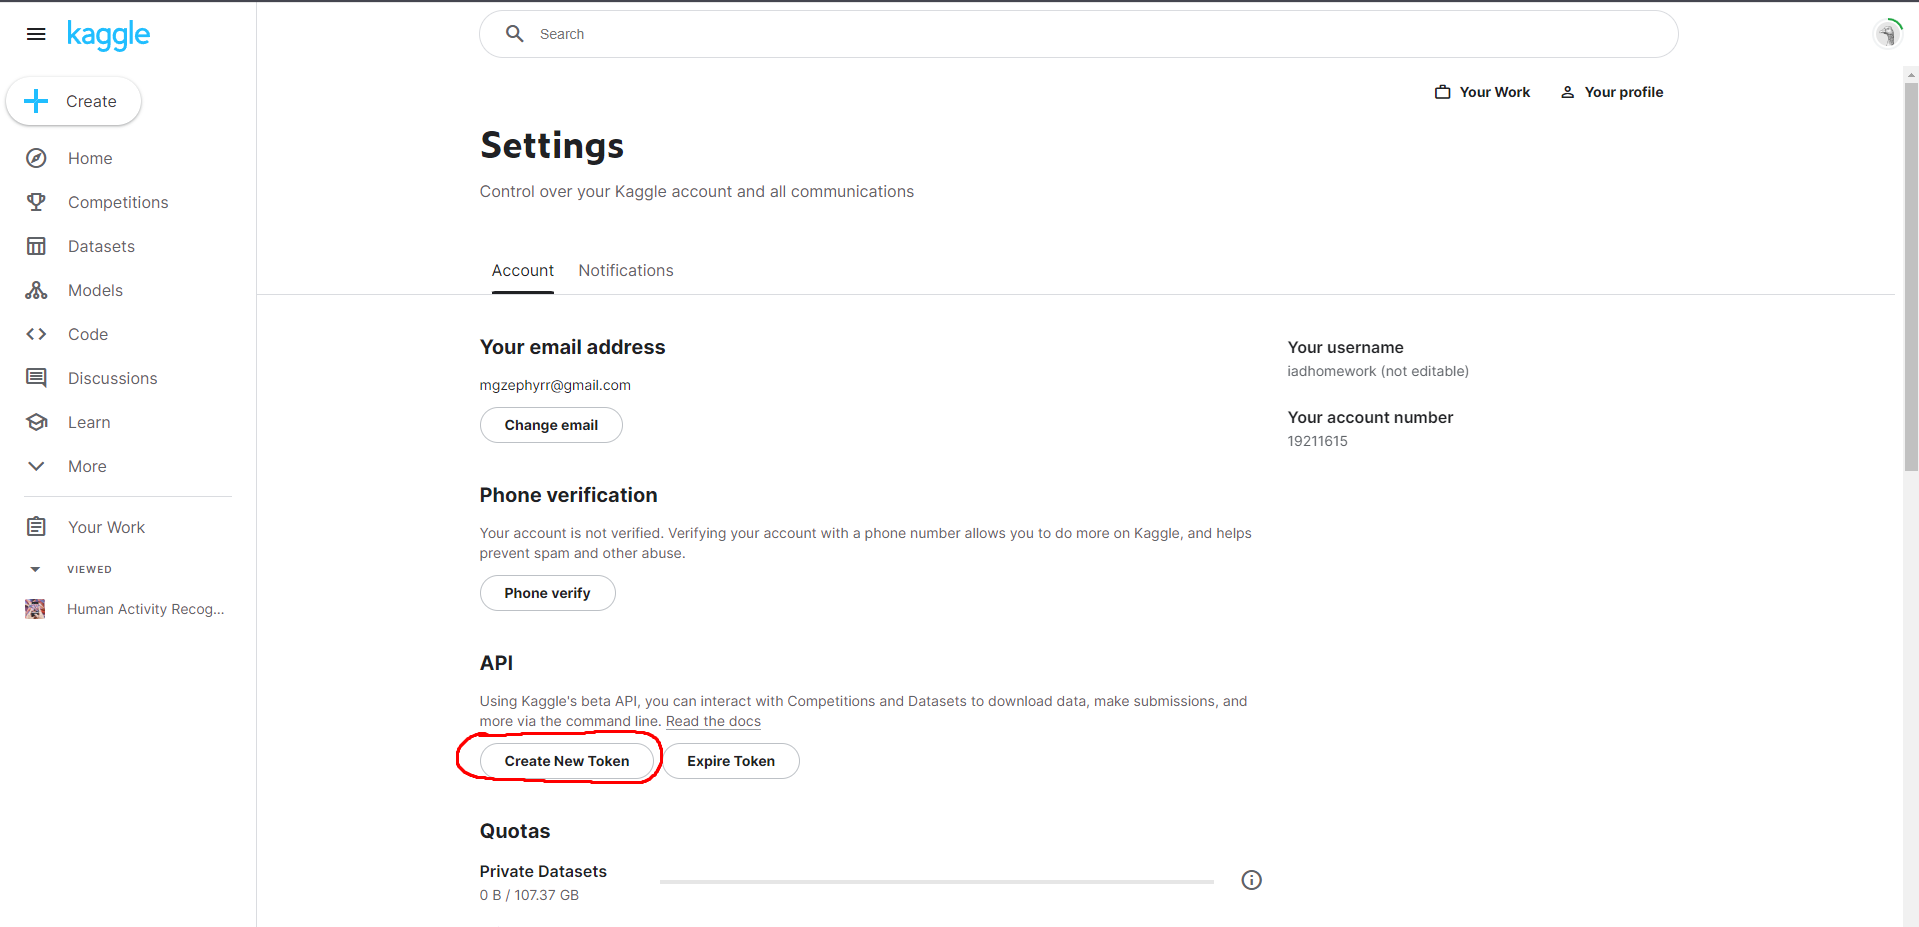

### Импорт датасета

>Ниже нужно нажать кнопку **выбрать файлы**, найти файл `kaggle.json` на своем компьютере и загрузить его.
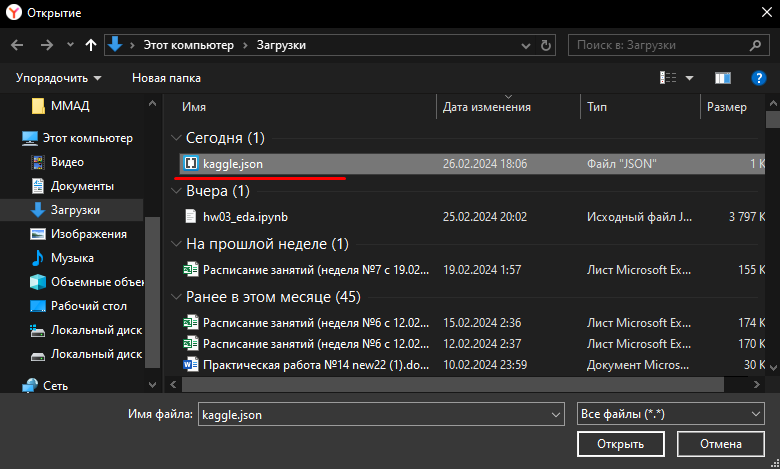

In [3]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


In [4]:
! kaggle datasets download uciml/human-activity-recognition-with-smartphones

 57% 14.0M/24.5M [00:00<00:00, 135MB/s]
100% 24.5M/24.5M [00:00<00:00, 150MB/s]


In [5]:
with zipfile.ZipFile('human-activity-recognition-with-smartphones.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [6]:
cols_subset = [
    'tBodyAccMag-mean()',  # усредненная величина ускорения тела
    'tBodyGyroJerk-mad()-X',  # медианная величина рывка тела по оси Х
    'tGravityAcc-min()-X',  # минимум гравитационной составляющей ускорения по оси Х
    'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х
    'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты
    'angle(X,gravityMean)',  # угол между осью Х и усредненной гравитационной составляющей ускорения
    'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
    'angle(Z,gravityMean)',  # угол между осью Z и усредненной гравитационной составляющей ускорения,
    'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
    'subject',  # номер испытуемого
    'Activity',  # название вида деятельности (целевая переменная)
]

df_train = pd.read_csv('train.csv')[cols_subset]
df_test = pd.read_csv('test.csv')[cols_subset]

## Задание 1

Посмотрите на пропуски и дубли в данных train и test. Есть ли они? Если есть, напишите, с чем это может быть связано? Если нет, то просто напишите, что пропусков и/или дублей нет.

**Проверка на пропущенные значения:**

In [7]:
df_train.isna().sum().sum()

0

In [8]:
df_test.isna().sum().sum()

0

Пропусков в датасете нет (оба выражения выше равняются нулю), однако, если бы они были, то их бы пришлось как-то обработать. Например, исключить из датасета записи, в которых есть пропущенные значения (или, если пропущенное значение - числовое, то можно попробовать его как-то заполнить: средним, модой, медианой и т.д.).

**Пример исключения из датасета записей с пропущенными значениями:**

In [9]:
df = pd.DataFrame({
    "letter": ['a', 'b', None, 'c', 'b', 'a'],
    "number": [pd.NA, 2, 3, 3, pd.NA, 1]
})

df.isna().sum().sum()

3

Видим, что выражение не равно 0, значит в датасете есть поврежденные или пропущенные данные.

In [10]:
df = df.dropna()
df

letter number
1      b      2
3      c      3
5      a      1

Таким образом, мы получим датасет, в котором не будет поврежденных данных.

**Проверка датасета на дубликаты:**

In [11]:
df_train.duplicated().sum()

0

In [12]:
df_test.duplicated().sum()

0

Дубликатов в датасете также нет (оба выражения выше равняются нулю), однако, если бы они были, хорошо было бы удалить все повторяющиеся записи и оставить их в датасетах в единственном экземпляре.

**Пример исключения из датасета повторяющихся записей:**

In [13]:
df = pd.DataFrame({
    "letter": ['a', 'b', 'c', 'c', 'b', 'a'],
    "number": [1, 2, 3, 3, 4, 1]
})

df.duplicated().sum()

2

Видим, что выражение не равно 0, значит в датасете есть повторяющиеся записи.

In [14]:
df = df.drop_duplicates()
df

letter  number
0      a       1
1      b       2
2      c       3
4      b       4

Таким образом, мы получим датасет, в котором не будет повторяющихся записей.

## Задание 2

Выведите основные статистики данных: среднее, медиана, перцентили (0.25, 0.5, 0.75), минимум, максимум, стандартное отклонение. Посмотрите на таблицу и напишите, видите ли вы в ней что-нибудь интересное.

In [15]:
df_train.describe()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
count         7352.000000            7352.000000          7352.000000   
mean            -0.543884              -0.727735             0.678505   
std              0.477653               0.315832             0.508656   
min             -1.000000              -0.999889            -1.000000   
25%             -0.983282              -0.991595             0.804270   
50%             -0.883371              -0.950268             0.926693   
75%             -0.106892              -0.474625             0.965095   
max              1.000000               1.000000             1.000000   

       tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
count       7352.000000                   7352.000000           7352.000000   
mean          -0.468604                     -0.847963             -0.489547   
std            0.544547                      0.233633              0.511807   
min           -1.000000                     -1.000000             -1.000000   
25%           -0.936219                     -0.999480             -0.812065   
50%           -0.881637                     -0.986582             -0.709417   
75%           -0.017129                     -0.764508             -0.509079   
max            1.000000                      1.000000              1.000000   

       angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
count           7352.000000           7352.000000            7352.000000   
mean               0.058593             -0.056515              -0.128562   
std                0.297480              0.279122               0.403686   
min               -1.000000             -1.000000              -0.931208   
25%               -0.017885             -0.143414              -0.486841   
50%                0.182071              0.003181              -0.163271   
75%                0.248353              0.107659               0.155112   
max                0.478157              1.000000               1.000000   

           subject  
count  7352.000000  
mean     17.413085  
std       8.975143  
min       1.000000  
25%       8.000000  
50%      19.000000  
75%      26.000000  
max      30.000000

In [16]:
df_test.describe()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
count         2947.000000            2947.000000          2947.000000   
mean            -0.559043              -0.735661             0.696878   
std              0.439539               0.282074             0.502873   
min             -0.998936              -1.000000            -0.756774   
25%             -0.978433              -0.989078             0.836787   
50%             -0.861830              -0.914698             0.934930   
75%             -0.149596              -0.486423             0.970871   
max              0.479547               0.117606             0.996148   

       tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
count       2947.000000                   2947.000000           2947.000000   
mean          -0.462063                     -0.880361             -0.513923   
std            0.523916                      0.160496              0.509205   
min           -0.952357                     -0.999989             -0.984195   
25%           -0.934447                     -0.999330             -0.829722   
50%           -0.852659                     -0.979336             -0.729648   
75%           -0.009965                     -0.799113             -0.545939   
max            0.786436                      0.048730              0.833180   

       angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
count           2947.000000           2947.000000            2947.000000   
mean               0.074886             -0.048720              -0.154042   
std                0.324300              0.241467               0.392203   
min               -0.913704             -0.949228              -1.000000   
25%                0.022140             -0.098485              -0.497070   
50%                0.181563             -0.010671              -0.202050   
75%                0.260252              0.092373               0.140254   
max                1.000000              0.973113               0.960367   

           subject  
count  2947.000000  
mean     12.986427  
std       6.950984  
min       2.000000  
25%       9.000000  
50%      12.000000  
75%      18.000000  
max      24.000000

В целом, подозреваю, что анализ датасетов происходит не совсем так, как нам предложено сделать в этом задании (возможно, это задание как раз и существует для того, чтобы показать, что просто смотря на нормализованные данные сказать что-то по датасету тяжело, нужно это как-то визуализировать).

Однако, несмотря на мои догадки, могу высказать свои наблюдения по датасетам.

**Обучающая выборка:**


*   В некоторых значениях наблюдаются странности, например, в столбце `fBodyAcc-bandsEnergy()-1,8.2` средним значением является -0.847963, а максимальным - 1. При этом если заметить, что стандартное отклонение по величине равно 0.233633, путем несложных математических вычислений можно понять, что среднее и максимальное значение разделяет почти 8(!) среднеквадратичных отклонений, что наталкивает на мысль о том, что в датасете могут быть выбросы (не факт, что это они). Подобные аномалии видны почти в каждом столбце, отдельно расписывать каждую из них я не буду.
*   В столбце `tGravityAcc-min()-X` наблюдается тот же феномен, но в обратную сторону. Здесь минимальное значение оказывается сильно далеко от среднего и 25%, что также показывает, что выбросы могут присутствовать в датасете.






 **Тестовая выборка:**


*   В тестовой выборке наблюдается то же самое, что я описал выше для обучающей выборки, но в более "мягком" виде, значения чуть ближе к друг другу, за исключением `angle(Y,gravityMean)`, в котором максимум - единица.
*   Если сравнивать перцентили тестовой и обучающей выборки, то можно заметить, что они +- совпадают, это может говорить о том, что данные хорошо разделены по выборкам.



## Задание 3

Данные сбалансированы? У вас есть 6 категорий активности (целевая переменная). Если одна из категорий представлена большим количеством наблюдений, а остальные - нет, то это обстоятельство, о котором хотелось бы знать заранее. Гиперболизированный пример: представьте, что у вас 1000 наблюдений, разделенных на два класса, и только 5 принадлежат ко второму классу. Как учить модель на такой выборке? Есть сильное подозрение, что многие модели будут склонны вырождаться в константу. Отсюда и необходимость проверять баланс классов.

Выведите количество наблюдений для всех категорий активности в train и test. Посчитайте разницу в процентах между самой крупной категорией и самой маленькой (самая большая категория - это 100%). Если разница (округленная до ближайшего целого числа) не превышает 30%, то давайте для наших целей считать, что данные сбалансированы. Напишите, сбалансированы ли данные в train и test.

In [17]:
(df_train['Activity'].value_counts() / max(df_train['Activity'].value_counts()) * 100).round()

LAYING                100.0
STANDING               98.0
SITTING                91.0
WALKING                87.0
WALKING_UPSTAIRS       76.0
WALKING_DOWNSTAIRS     70.0
Name: Activity, dtype: float64

In [18]:
(df_test['Activity'].value_counts() / max(df_test['Activity'].value_counts()) * 100).round()

LAYING                100.0
STANDING               99.0
WALKING                92.0
SITTING                91.0
WALKING_UPSTAIRS       88.0
WALKING_DOWNSTAIRS     78.0
Name: Activity, dtype: float64

Баланс классов соблюдён, разница в процентах между самой крупной и самой маленькой категорией в датасете не превышает 30%.

## Задание 4

Посчитайте корреляции всех признаков (включая таргет) со всеми другими. Какими получились значения? Есть идеи, почему так? Напишите ваши мысли.

In [19]:
df_for_corr = pd.get_dummies(pd.concat([df_train, df_test], ignore_index=True), columns=['Activity'])
df_for_corr.corr().round(2)

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  \
tBodyAccMag-mean()                          1.00                   0.91   
tBodyGyroJerk-mad()-X                       0.91                   1.00   
tGravityAcc-min()-X                         0.38                   0.38   
tBodyAcc-max()-X                            0.96                   0.88   
fBodyAcc-bandsEnergy()-1,8.2                0.71                   0.53   
angle(X,gravityMean)                       -0.38                  -0.38   
angle(Y,gravityMean)                        0.48                   0.46   
angle(Z,gravityMean)                        0.43                   0.38   
fBodyAcc-skewness()-X                       0.38                   0.27   
subject                                    -0.06                  -0.10   
Activity_LAYING                            -0.41                  -0.39   
Activity_SITTING                           -0.40                  -0.38   
Activity_STANDING                          -0.41                  -0.37   
Activity_WALKING                            0.36                   0.53   
Activity_WALKING_DOWNSTAIRS                 0.55                   0.45   
Activity_WALKING_UPSTAIRS                   0.40                   0.26   

                              tGravityAcc-min()-X  tBodyAcc-max()-X  \
tBodyAccMag-mean()                           0.38              0.96   
tBodyGyroJerk-mad()-X                        0.38              0.88   
tGravityAcc-min()-X                          1.00              0.38   
tBodyAcc-max()-X                             0.38              1.00   
fBodyAcc-bandsEnergy()-1,8.2                 0.25              0.63   
angle(X,gravityMean)                        -0.99             -0.38   
angle(Y,gravityMean)                         0.77              0.46   
angle(Z,gravityMean)                         0.66              0.40   
fBodyAcc-skewness()-X                       -0.26              0.34   
subject                                     -0.03             -0.06   
Activity_LAYING                             -0.98             -0.40   
Activity_SITTING                             0.19             -0.39   
Activity_STANDING                            0.26             -0.40   
Activity_WALKING                             0.23              0.29   
Activity_WALKING_DOWNSTAIRS                  0.19              0.65   
Activity_WALKING_UPSTAIRS                    0.16              0.35   

                              fBodyAcc-bandsEnergy()-1,8.2  \
tBodyAccMag-mean()                                    0.71   
tBodyGyroJerk-mad()-X                                 0.53   
tGravityAcc-min()-X                                   0.25   
tBodyAcc-max()-X                                      0.63   
fBodyAcc-bandsEnergy()-1,8.2                          1.00   
angle(X,gravityMean)                                 -0.22   
angle(Y,gravityMean)                                  0.35   
angle(Z,gravityMean)                                  0.42   
fBodyAcc-skewness()-X                                 0.27   
subject                                              -0.03   
Activity_LAYING                                      -0.29   
Activity_SITTING                                     -0.28   
Activity_STANDING                                    -0.30   
Activity_WALKING                                      0.19   
Activity_WALKING_DOWNSTAIRS                           0.22   
Activity_WALKING_UPSTAIRS                             0.52   

                              angle(X,gravityMean)  angle(Y,gravityMean)  \
tBodyAccMag-mean()                           -0.38                  0.48   
tBodyGyroJerk-mad()-X                        -0.38                  0.46   
tGravityAcc-min()-X                          -0.99                  0.77   
tBodyAcc-max()-X                             -0.38                  0.46   
fBodyAcc-bandsEnergy()-1,8.2                 -0.22                  0.35   
angle(X,gravityMean)               

Чтобы включить таргетную переменную в корреляцию был использован метод one-hot encoding.

*  Можно заметить, что у признаков `Activity_LAYING` и `angle(X,gravityMean)` очень сильная прямая зависимость. Особенно если учесть, что `Activity_LAYING` принимает только значения 0 или 1, отмечу, что высокие значения показателя `angle(X,gravityMean)` практически гарантируют, что человек в это время лежал.
*  В свою очередь показатель `tGravityAcc-min()-X` с `Activity_LAYING` имеют диаметрально противоположную, сильную обратную зависимость. Чем меньше значение `tGravityAcc-min()-X`, тем более вероятно, что человек в это время лежал.
*  Большой показатель корреляции между `tBodyAccMag-mean()` и `tBodyGyroJerk-mad()-X` говорит о том, что эти 2 величины сильно связаны друг с другом (это и логично, поскольку `tBodyGyroJerk-mad()-X` это величина рывка тела по оси Х, а `tBodyAccMag-mean()` это величина ускорения тела. Логично, что чем больше ускорение тела, тем больше рывок тела по оси Х).
*  Очевидно, что у всех Activities между собой отрицательная корреляция по причине того, что в строчке только 1 показатель может быть равным 1, в то время как все остальные равны 0 (два показателя могут различаться по значениям, а могут быть оба нулями, при этом, в силу сбалансированности нашего датасета, нет никакой активности, для которой не нашлась бы запись с единичкой в значении).
*  Между показателями `tGravityAcc-min()-X` и `angle(X,gravityMean)` наблюдается практически полная обратная зависимость.
*  Смотря сейчас на корреляции хочется сказать, что, скорее всего, то о чем я говорил во 2 задании - не выбросы, а очень сильно взаимосвязанные с активностью параметры (и нормально, что максимальное значение очень сильно отличается от 75% и среднего, потому что одна активность это примерно 1/6 датасета, что меньше 25%).

## Задание 5

Вы проверили основную информацию о данных и составили свое первое впечатление о них. Теперь визуализации.

Начнем рисовать графики с небольшой разминки. Выберите две любые математические функции (отличные от линейной) и нарисуйте их на одном графике. Подпишите каждый из графиков, чтобы было понятно, какие функции вы выбрали. Ниже будет пример.

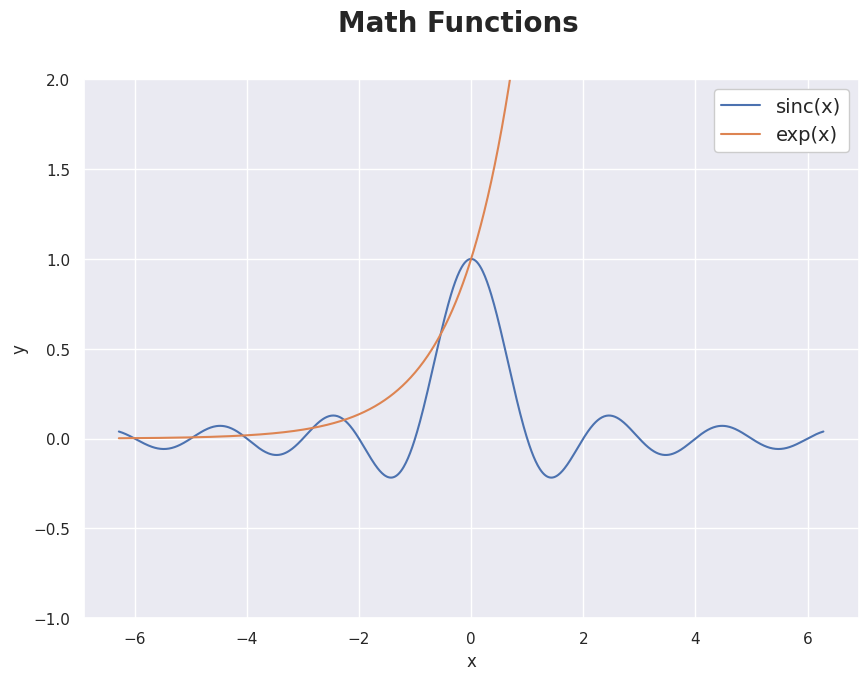

In [20]:
sns.set_theme()
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
fig, ax = plt.subplots(figsize=(10, 7))
fig.suptitle('Math Functions', fontsize=20, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.ylim(-1, 2)
plt.plot(x, np.sinc(x), label='sinc(x)')
plt.plot(x, np.exp(x), label='exp(x)')
plt.legend(fontsize=14, framealpha=1, facecolor='w')
plt.show()

## Задание 6

Ранее мы уже проверили сбалансированность данных по разным категориям активностей в train и test сетах. Теперь визуализируйте количество сэмплов в каждой из категорий отдельно для train и test сетов, как в примере ниже. Проследите, чтобы порядок категорий слева и справа был одинаков. Иначе не очень удобно их сравнивать (когда они в разных местах двух графиков). Также заметьте, что в примере ось Х в одинаковом масштабе, что тоже удобно для сравнения.

Вам может пригодиться:
- plt.barh или ax.barh

Правда на таких графиках проще проверять баланс классов таргета?)

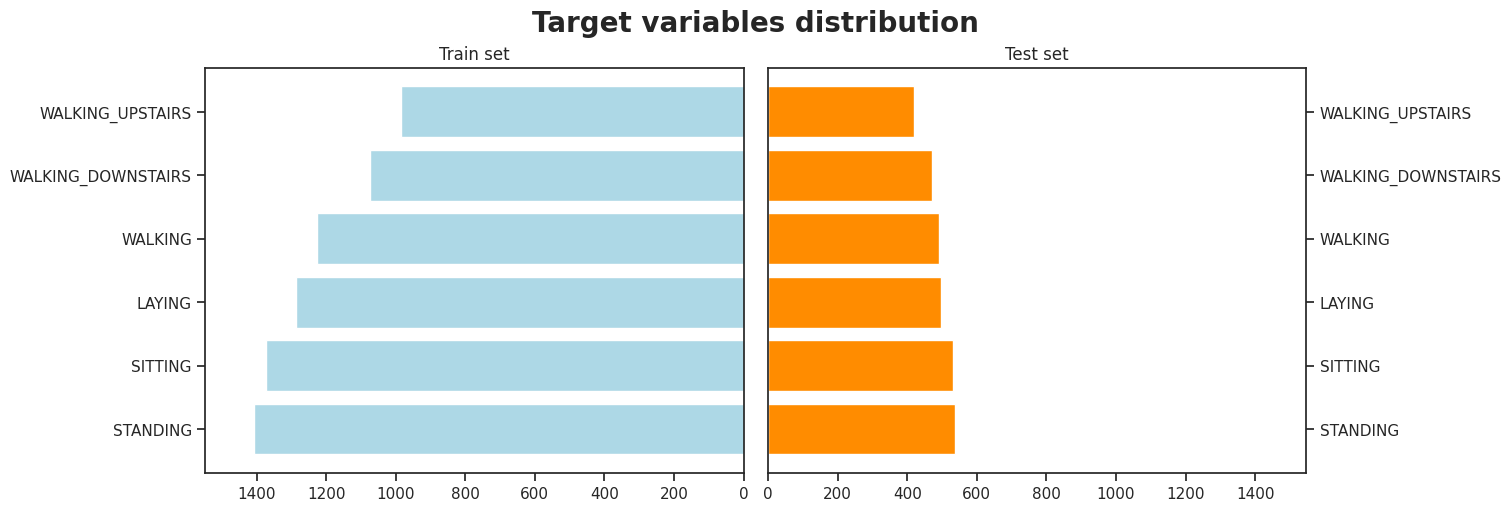

In [21]:
sns.set_style("ticks")

lim = max(df_test['Activity'].value_counts().max(), df_train['Activity'].value_counts().max())
lim += lim / 10

df1 = df_train['Activity']
df2 = df_test['Activity']

y = df_train['Activity'].unique()
x1 = df_train['Activity'].value_counts()
x2 = df_test['Activity'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(15, 5), layout="compressed")

fig.suptitle('Target variables distribution', fontsize=20, fontweight='bold')
axes[0].set_title('Train set')
axes[1].set_title('Test set')

axes[0].barh(y, x1, align='center', color='lightblue')
axes[1].barh(y, x2, align='center', color='darkorange')

axes[0].set_xlim(0, lim)
axes[0].invert_xaxis()
axes[1].set_xlim(0, lim)
axes[1].yaxis.tick_right()
axes[1].tick_params(labelright=True, labelleft=False)

На самом деле, на таком графике, лично мне, намного более неудобно проверять баланс классов таргета, чем с использованием числовых относительных значений.

На графике плохо видны конкретные величины. Например, если задача стоит оценить баланс классов, чтобы максимальный превосходил по кол-ву минимальный не более, чем на 30%, то посмотреть на это с помощью чисел гораздо удобнее, чем оценивать на глаз 30% на графике.

Особенно неудобным считаю 2 горизонтальных графика, которые смотрят в разные стороны. Если нужно 2 бар-чарта, отражающих одни и те же величины, почему бы не сделать их вертикальными и рядом друг с другом (например, `WALKING_UPSTAIRS` из обучающей выборки стоит рядом с `WALKING_UPSTAIRS` из тестовой выборки, далее идет пробел и снова 2 столбика и т.д.).

К тому же, строить такой график гораздо более сложно и затратно, нежели посчитать процентики.

## Задание 7

Ранее вы выводили таблицу корреляций. Однако просто таблица корреляций не очень удобна для анализа. Что, если признаков было бы больше? Визуализируйте heatmap корреляций. Подпишите значения корреляций, округленные до 2 знаков после запятой, на графике и оставьте только те значения, которые по модулю не меньше 0.5. Будем считать такие корреляции существенными. Если будете брать код из семинарского ноутбука, то поменяйте в нем что-нибудь, например, цветовую гамму, иначе проверяющий будет карать :)

Какой признак стоит исключить из рассмотрения корреляций? Напишите его название, а также причину, почему нет смысла его рассматривать.

Вам может пригодиться:
- sns.heatmap
- методы get_text и set_text у атрибута texts графика

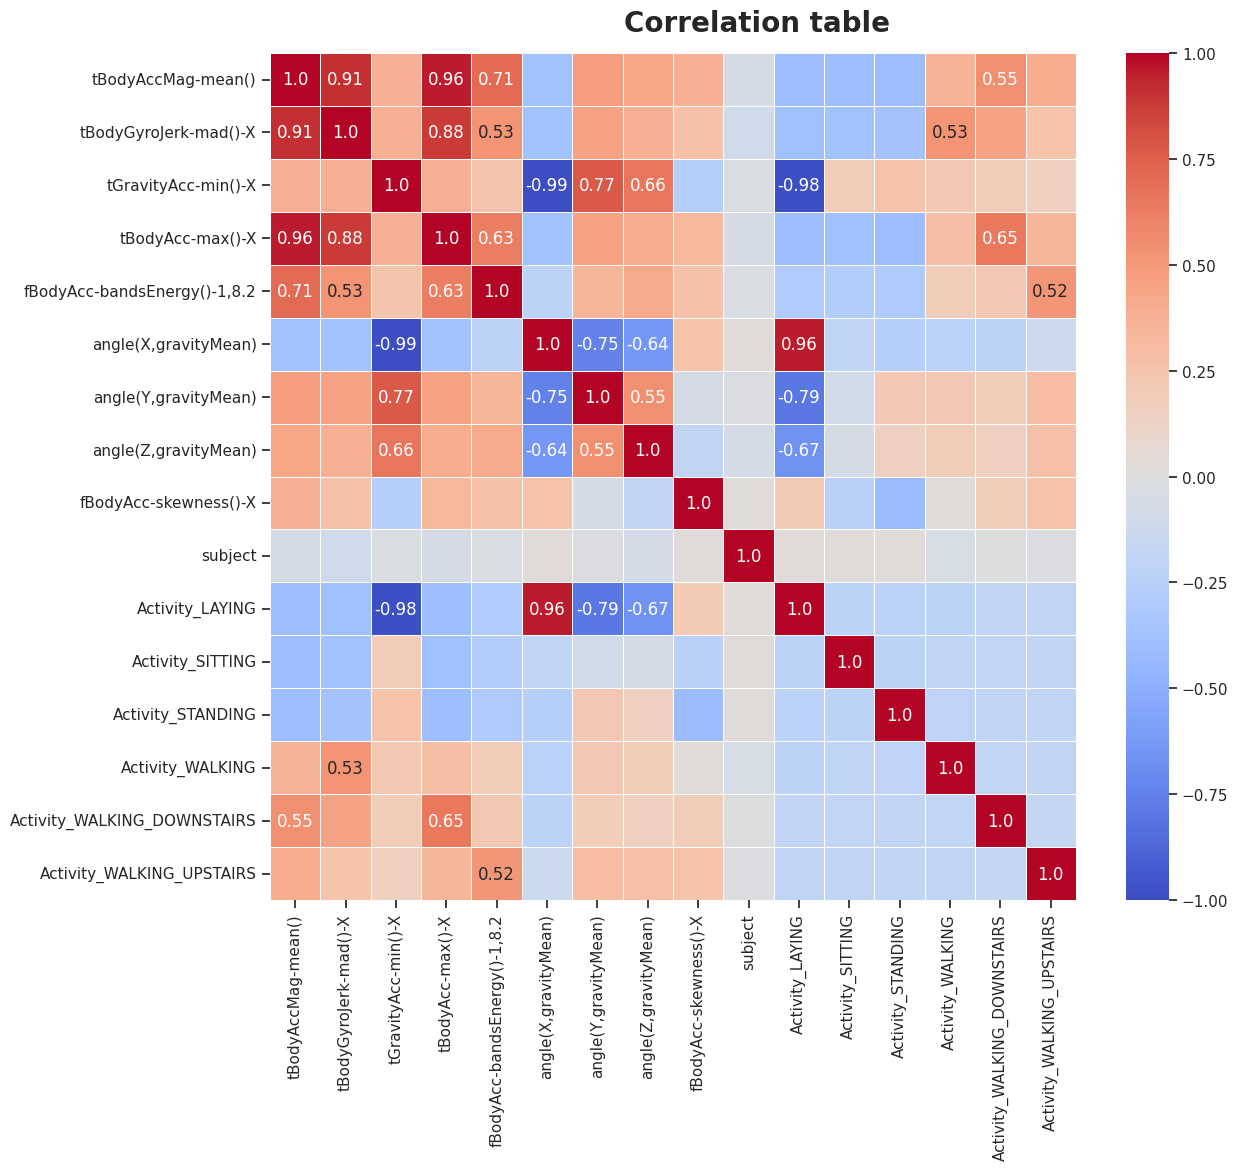

In [22]:
fig, ax = plt.subplots(figsize=(13, 11))
fig.suptitle('Correlation table', fontsize=20, fontweight='bold', y = 0.92)
matr = df_for_corr.corr().round(2)
ax = sns.heatmap(matr, vmin=-1, vmax=1, annot=matr[matr.abs() >= 0.5].fillna(''), linewidth=.5, fmt='', cmap='coolwarm')

По моему мнению, признак "Subject" является бесполезным в плане построения корреляций между другими величинами, как минимум, потому что он не нормализован, а также, потому что он даже с логической точки зрения не должен ни на что влиять.


## Задание 8

Для начала будем стрелять из пушки по воробьям. Выведите pairplot по всем данным train сета. Напишите, заметили ли вы в нем что-нибудь интересное, чего не было в таблицах и графиках ранее, а также сообщите, было ли вам удобно анализировать 100 графиков.

Text(0.5, 1.03, 'Pairplot')

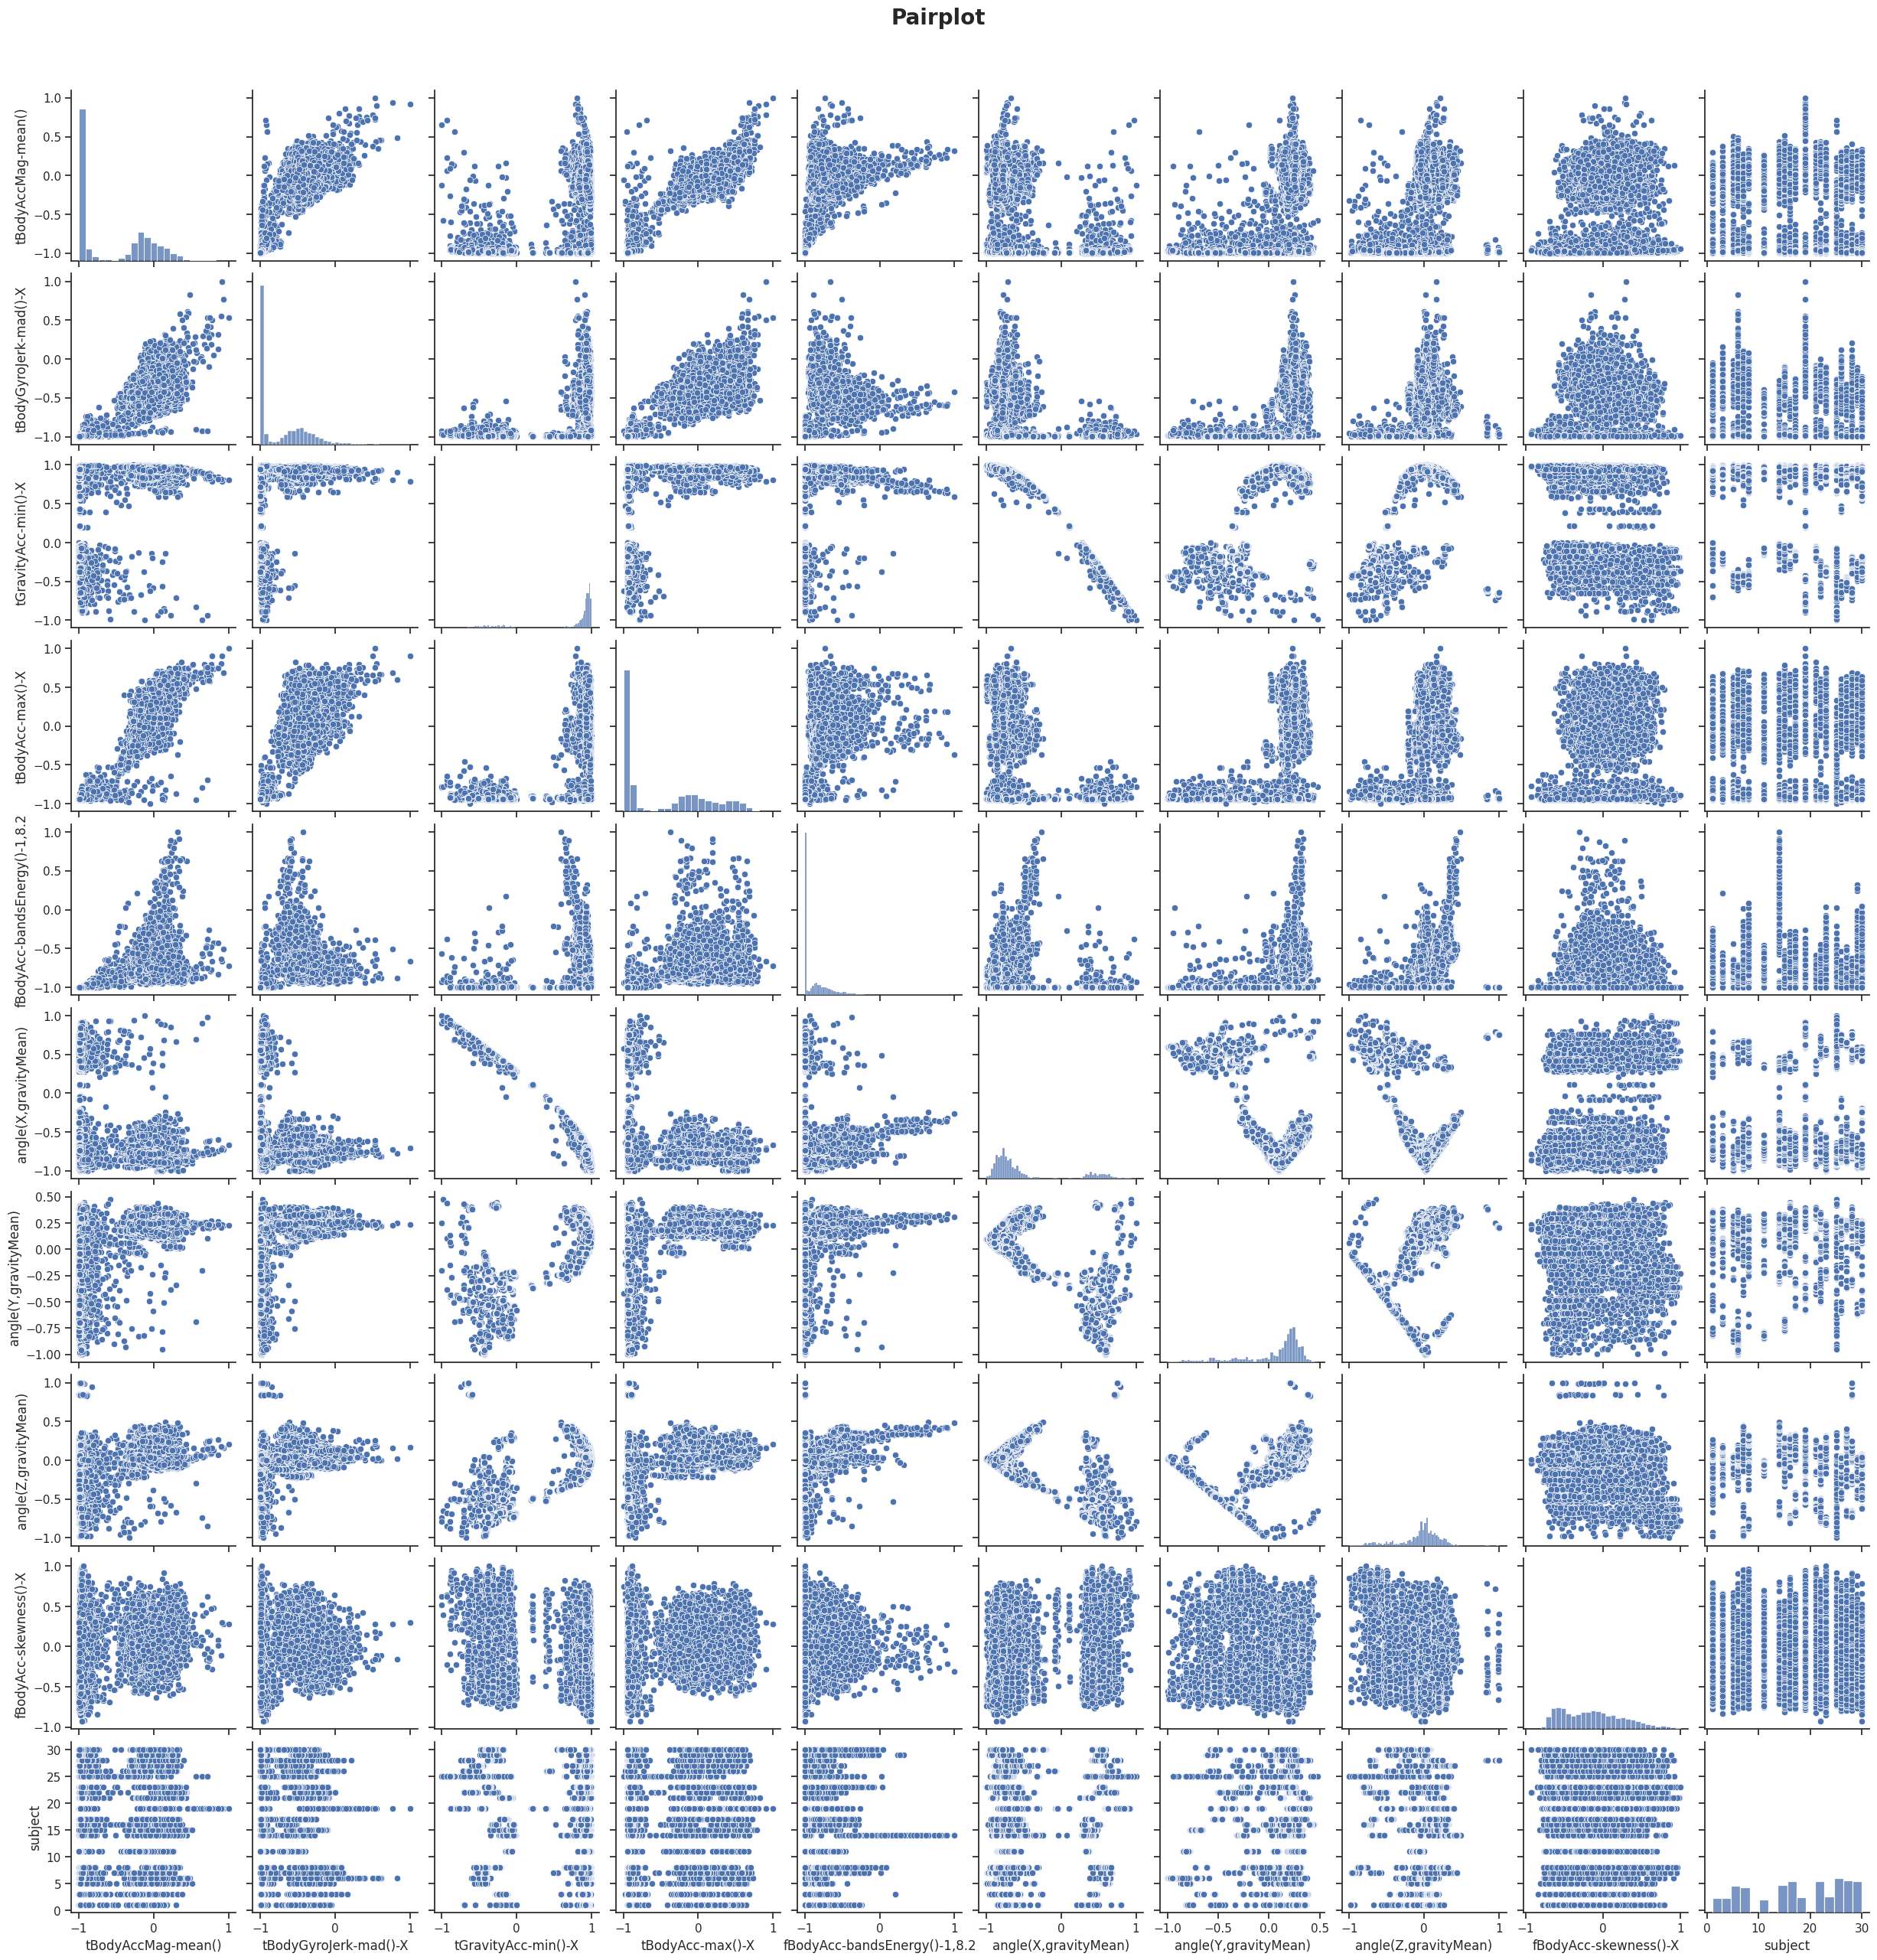

In [38]:
fig = sns.pairplot(df_train)
fig.fig.suptitle('Pairplot', fontsize=20, fontweight='bold', y=1.03)

В целом, основные тренды, которые можно заметить на этих графиках я уже написал (зависимости между разными величинами, приближенные к практически идентичным значениям, смещенность некоторых признаков в сторону минимума, например `tBodyAccMag-mean()`, `tBodyGyroJerk-mad()-X` и `tBodyAcc-max()-X`), а в остальном здесь описывать практически нечего. Не говоря уже о том, что делать это крайне неудобно, в первую очередь, из-за масштаба графиков и их представления.

Однако можно отметить некоторые новые факты:

*  Некоторые испытуемые не имеют данных в обучающей выборке (т.е. все их показания оказались в тестовой). Например: испытуемые номер 0, 9, 20 и другие, которых тяжело назвать из-за масштабирования.
*  У величин `tGravityAcc-min()-X` и `angle(X,gravityMean)` практически отсутствуют серединные величины. Значения разнесены по краям величины (ближе к -1 и ближе к 1).

## Задание 9

Окей. Смотреть на все сразу не очень удобно. Кажется, нужно смотреть на признаки в отдельности и искать в них инсайты.

Попробуем проверить гипотезу. Отобразите плотность распределения (kde) `tBodyAccMag-mean()` для каждой из активностей, как в примере ниже. Видите закономерность? Можно ли поделить все активности на две группы? Если да, то проведите вертикальную линию, которая визуально неплохо разделяет эти группы.

Давайте первую группу называть статическими активностями, а вторую - динамическими.

Посчитайте, какую долю правильных ответов дает ваша вертикальная линия для разделения именно этих двух групп. С чем может быть связан полученный вами результат? Предположите логическое обоснование (почему именно данный признак так хорошо/плохо разделяет группы активностей).

Вам может пригодиться:
- sns.kdeplot

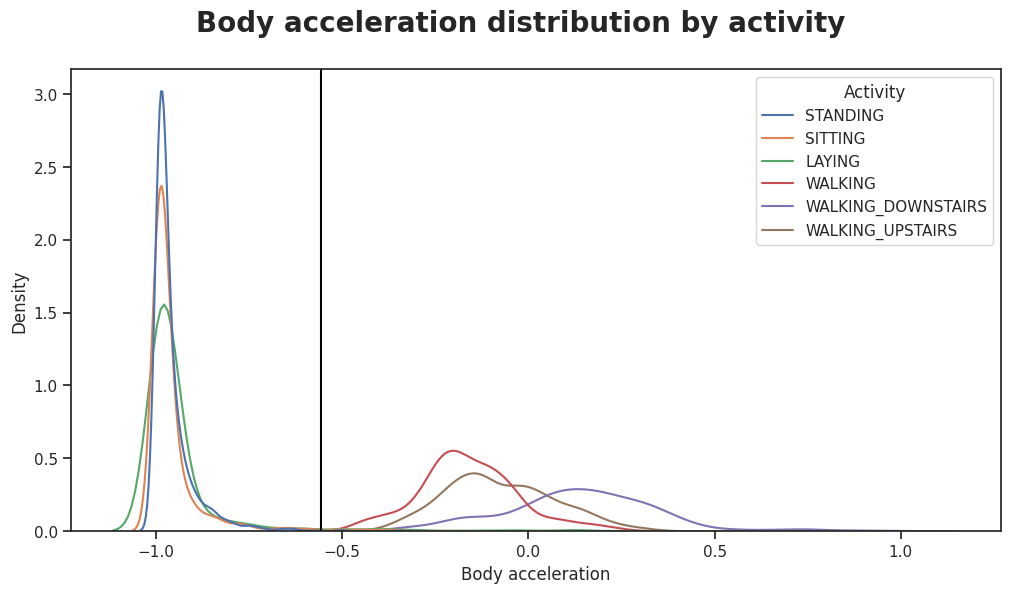

In [28]:
fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle('Body acceleration distribution by activity', fontsize=20, fontweight='bold')
ax = sns.kdeplot(data=df_train, x='tBodyAccMag-mean()', hue='Activity')
ax.set_xlabel('Body acceleration')
x_line = -0.556
ax.axvline(x = x_line, ymin = 0, ymax = 1, color='black')

В целом, линию разделения можно было построить идеальнее, если запустить цикл с определенным шагом от примерно -0.65 до -0.5 и подсчитать ошибку на каждом шаге, но, т.к. в задании сказано определить "визуально", я так и поступлю.

In [29]:
static = ['STANDING', 'SITTING', 'LAYING']
dynamic = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS']

static_count = df_train['Activity'].value_counts()[static].sum()
dynamic_count = df_train['Activity'].value_counts()[dynamic].sum()

static_hit = (df_train[df_train['Activity'].isin(static)]['tBodyAccMag-mean()'] <= x_line).sum()
dynamic_hit = (df_train[df_train['Activity'].isin(dynamic)]['tBodyAccMag-mean()'] >= x_line).sum()

print(f'Доля правильных ответов для статичных активностей = {round(static_hit / static_count * 100, 2)}%')
print(f'Доля правильных ответов для динамических активностей = {round(dynamic_hit / dynamic_count * 100, 2)}%')

Доля правильных ответов для статичных активностей = 98.33%
Доля правильных ответов для динамических активностей = 100.0%


Очевидно, что невозможно идти куда-либо без ускорения тела. Поэтому точность на динамических активностях составляет 100%. На статических получается точность отличная от 100% по причине того, что во время сидения, лежания или стояния человек так или иначе может хоть немного, но двигаться, что создает ускорение тела.

## Задание 10

Поздравляем, вы проверили первую гипотезу в процессе EDA. Однако нам бы хотелось уметь не группы разделять, а каждый отдельный вид активности. Попробуйте нарисовать "ящики с усами" для `angle(X,gravityMean)` с разделением по разным видам активности на данных train. Можно ли сделать какой-то вывод по полученной визуализации? Проанализируйте и проинтерпретируйте полученные картинки (если заметили какую-то особенность, может какая-то категория значительно выделяется, то предположите, почему так могло произойти).

Вам может пригодиться:
- sns.boxplot

Text(0, 0.5, 'X-angle')

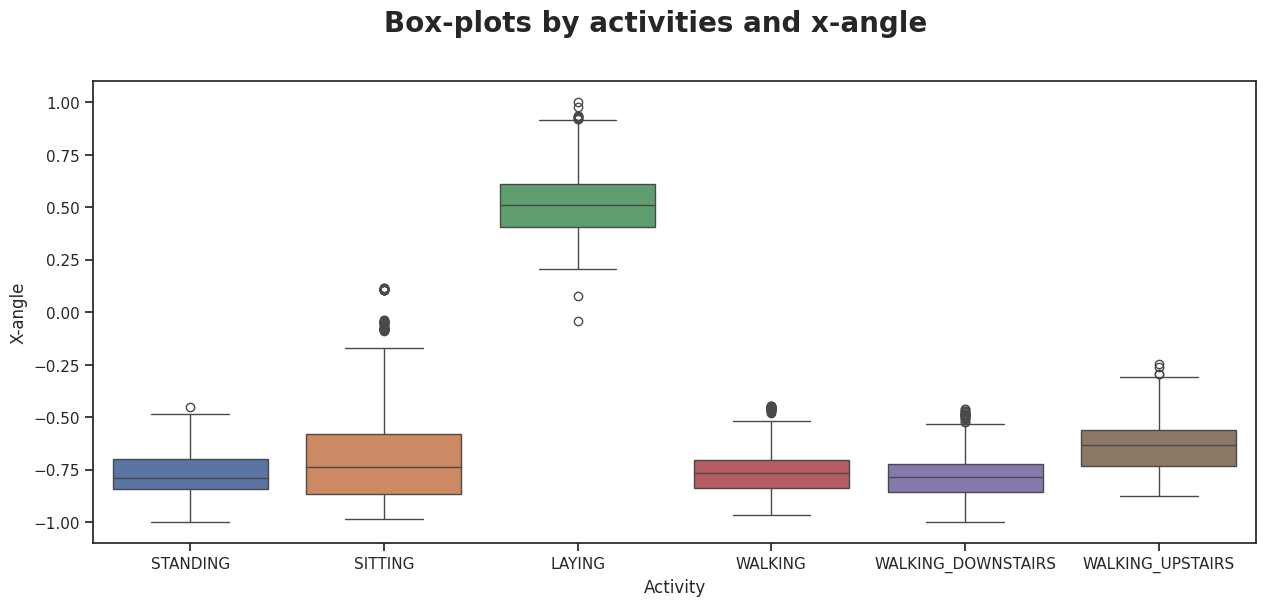

In [30]:
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.boxplot(data=df_train, x='Activity', y='angle(X,gravityMean)', hue='Activity')
fig.suptitle('Box-plots by activities and x-angle', fontsize=20, fontweight='bold', y = 1)
ax.set_ylabel('X-angle')

Среди всех активностей очень заметно выделяется laying (лежание). Факт взаимосвязи между `angle(X,gravityMean)` и **лежанием** я выявил и раньше, но здесь он проявляется более явно. Подозреваю, что это связано с тем, что положение человека становится горизонтальным, когда он ложится, в отличии от всех остальных активностей. Из-за этого возрастает угол между гравитационной составляющей ускорения и осью Х.

Также можно заметить выбросы, определяемые самими box-plot диаграммами в виде круглых точек за пределами "усов".

## Задание 11

Посмотрим теперь на `tBodyAcc-max()-X`. Визуализируйте скрипичные диаграммы для этого признака с разделением по активностям на всем train. Кажется логичным, что максимальное ускорение в моменте для разных активностей будет различаться. Однако есть ли активность, которая будет выделяться? Если да, то предложите объяснение, почему эта активность выделяется.

Вам может пригодиться:
- sns.violinplot

Text(0, 0.5, 'Maximal acceleration')

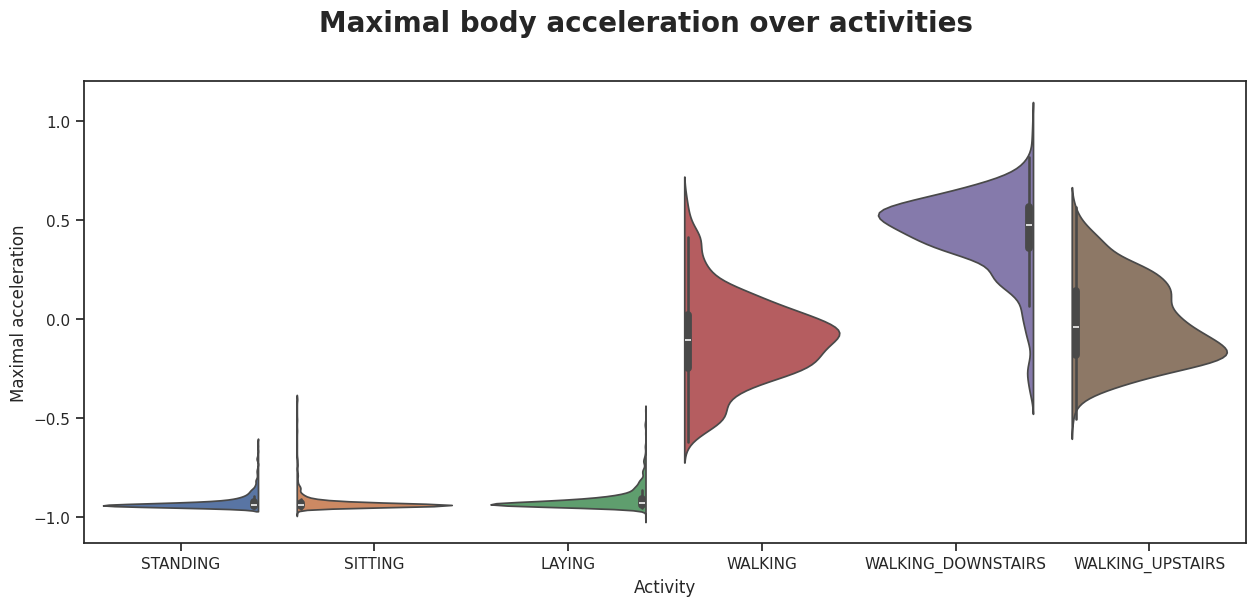

In [31]:
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.violinplot(data=df_train, x='Activity', y='tBodyAcc-max()-X', hue='Activity', split=True)
fig.suptitle('Maximal body acceleration over activities', fontsize=20, fontweight='bold', y = 1)
ax.set_ylabel('Maximal acceleration')

Из диаграммы можно увидеть, что у статичных активностей, максимальное ускорение является минимальным, это уже обсуждалось выше и в целом является логичным. Так же как и логичным является то, что для динамических активностей максимальное ускорение не является нулевым.

Среди статических не выделяется ни одна группа активностей, зато среди динамических можно выделить **спуск по лестнице вниз**. Эта активность имеет наибольшее среднее значение максимального ускорения тела. Происходит это, скорее всего, потому что при спуске с лестницы вниз очень многие люди чуть ли не бегут вниз, что закономерно увеличивает ускорение тела.

## Задание 12

Вы уже можете с довольно хорошим качеством выделить две категории активности из шести. Продолжим.

Ранее уже упоминалось разделение на две группы активностей: статические и динамические. Пришла пора разделить датасет train на две части. Сделайте это! Теперь на одной картинке покажите распределения `fBodyAcc-bandsEnergy()-1,8.2` для динамичных активностей (boxenplot - немного измененый "ящик с усами") и `angle(Y,gravityMean)` для статических - тут хватит и простой гистограммы (прямо, как в примере ниже). Можно ли выделить еще какие-то активности? Если да, напишите, какие активности на 1 и 2 графиках выделяются.

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec (заметили, что один график больше другого? попробуйте сами так сделать - вам понравится...)
- sns.boxenplot
- sns.histplot

<Axes: title={'center': 'Static activities'}, xlabel='Angle', ylabel='Count'>

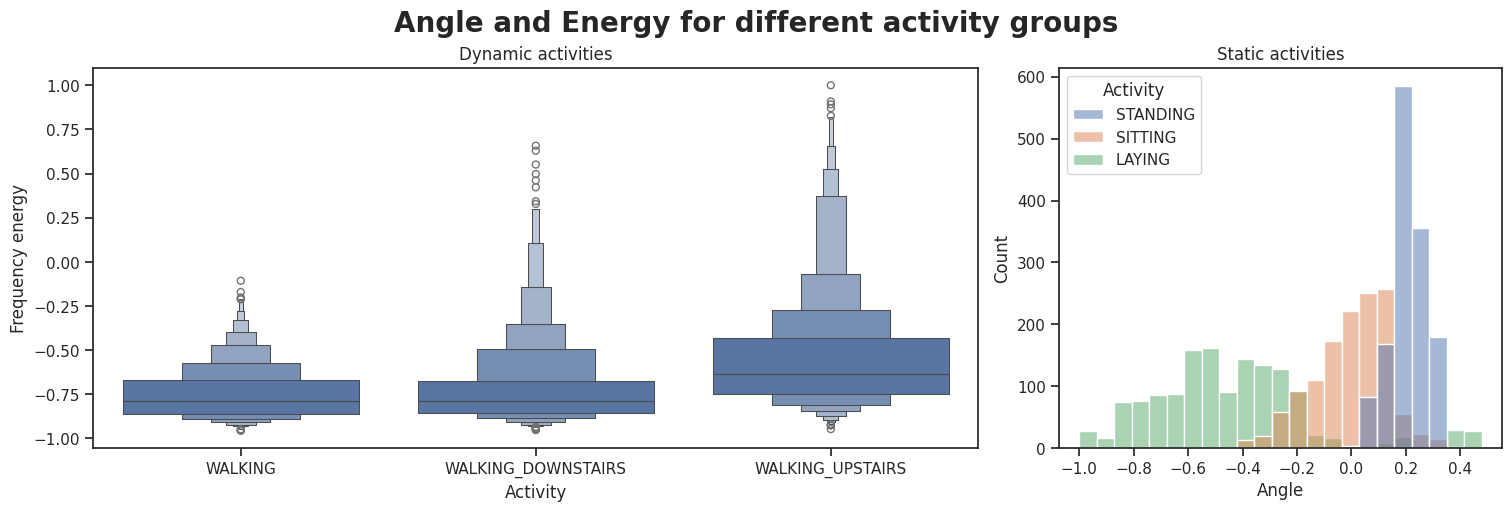

In [32]:
df_train_static = df_train[df_train['Activity'].isin(static)]
df_train_dynamic = df_train[df_train['Activity'].isin(dynamic)]

fig, axes = plt.subplots(1, 2, figsize=(15, 5), layout="compressed", gridspec_kw={'width_ratios': [2, 1]})

fig.suptitle('Angle and Energy for different activity groups', fontsize=20, fontweight='bold')
axes[0].set_title('Dynamic activities')
axes[1].set_title('Static activities')
axes[0].set_ylabel('Frequency energy')
axes[1].set_xlabel('Angle')
axes[1].set_ylabel('Count')

sns.boxenplot(data=df_train_dynamic, x='Activity', y='fBodyAcc-bandsEnergy()-1,8.2', ax=axes[0])
sns.histplot(data=df_train_static, x='angle(Y,gravityMean)', hue='Activity', ax=axes[1])

Среди динамических активностей по признаку `fBodyAcc-bandsEnergy()-1,8.2` явно выделяется **поднятие по лестнице вверх**, возможно, по причине того, что когда человек поднимается вверх, он противодействует силе притяжения, т.е. должен прикладывать больше сил, чтобы идти вверх. Чем больше сил прикладывает человек, тем больше энергии вырабатывается.

Что касается статических активностей, то по углу между осью Y и гравитационной составляющей ускорения, сильной сосредоточенностью и величиной значений отличается активность **"стояние"**, по причине того, что, когда человек стоит, угол между гравитационной составляющей ускорения и осью Y возрастает. Ко всему прочему, стоят все люди под (почти) одинаковым углом, в отличие от сидения и лежания.

## Задание 13

Не всегда жизнь будет такой легкой, а данные будут полностью или почти линейно разделимы в одному признаку (иначе чем бы занимались дата саентисты...). Часто данные вообще ни по одному признаку нельзя адекватно разделить (да и по комбинациям признаков тоже). Давайте попробуем взять не один признак, а целых два!

Рассмотрим только статические активности. Будет снова два графика сразу. На первом графике будет боксплот распределения `fBodyAcc-skewness()-X` по активностям. А на втором попробуем взять не все наблюдения данной группы активностей, а только их часть. Разделимы ли категории по `fBodyAcc-skewness()-X`? А если взять только те строки, где `fBodyAcc-skewness()-X < -0.376`, и теперь вывести боксплот распределения `angle(Y,gravityMean)` по разным активностям? Попробуйте и напишите, выделилась ли какая-то категория?

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.boxplot

<Axes: title={'center': 'Angle between Y-axis and gravity acceleration over activities'}, xlabel='Activity', ylabel='Angle'>

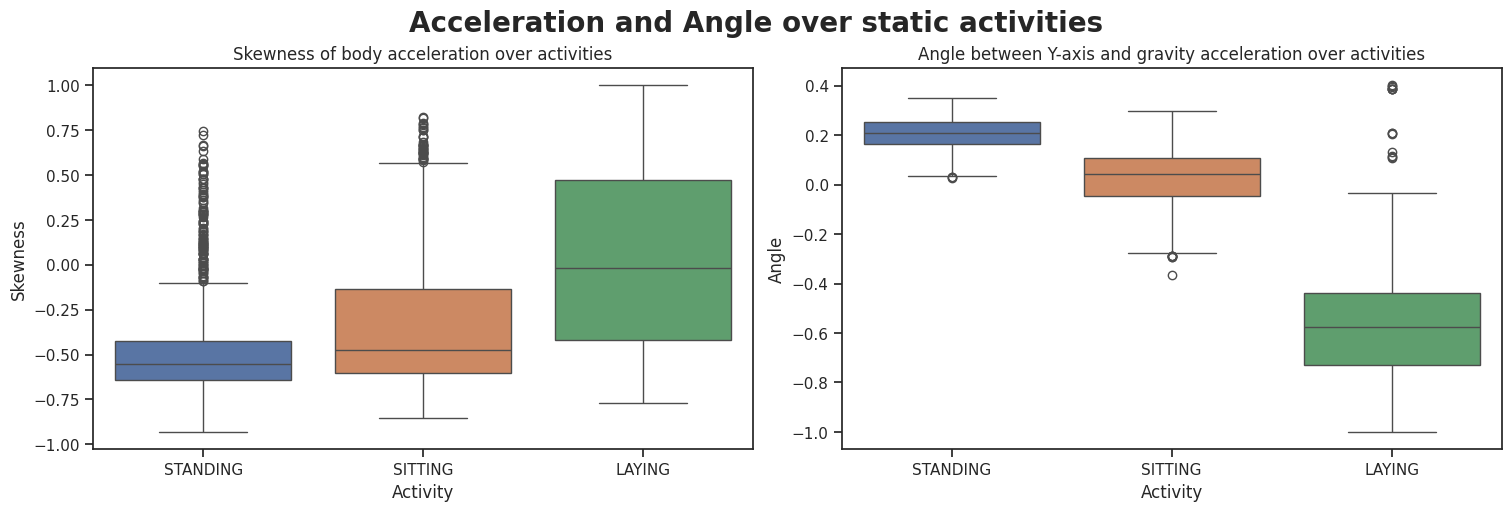

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), layout="compressed")

fig.suptitle('Acceleration and Angle over static activities', fontsize=20, fontweight='bold')
axes[0].set_title('Skewness of body acceleration over activities')
axes[1].set_title('Angle between Y-axis and gravity acceleration over activities')
axes[0].set_ylabel('Skewness')
axes[1].set_ylabel('Angle')

sns.boxplot(data=df_train_static, x='Activity', y='fBodyAcc-skewness()-X', hue='Activity', ax=axes[0])
sns.boxplot(data=df_train_static[df_train_static['fBodyAcc-skewness()-X'] < -0.376], x='Activity', y='angle(Y,gravityMean)', hue='Activity', ax=axes[1])

Не сказал бы, что какая-то категория прямо-таки выделилась, но могу сказать, что они стали хорошо различимы между друг другом после фильтра по `skewness`, в основном, можно легко отличить все 3 признака друг от друга по величинам (`STANDING` находится примерно в районе 0.2 по `Y-angle`, `SITTING` - от -0.05 до 0.1, `LAYING` - от -0.75 до -0.45).

## Задание 14

Вот и осталась лишь одна активность, которую мы никак не выделили. Попробуем и ее какими-то порогами отделить от всех остальных. Да, можно было бы сказать, что, раз уж мы выделили 5 из 6 категорий, то все остальное - это и есть последняя категория, но мы не идем легкими путями. Выделить оставшуюсь категорию с хорошим качеством не так уж и просто. Из доступных признаков, сначала посмотрите на распределение `tBodyAcc-max()-X` на динамических активностях (скрипичная диаграмма отлично подойдет).

А теперь спускаем вам порог `tBodyAcc-max()-X < 0.157`. Для таких строк постройте диаграмму рассеяния для признака `tGravityAcc-min()-X`. Да, получается неидеально, но это честная работа. Можно выбрать порог так, чтобы чисто из таблицы с динамическими активностями из строк, где `tBodyAcc-max()-X < 0.157`, выбрать по некоторому порогу для `tGravityAcc-min()-X` строки так, чтобы доля правильных ответов на оставшейся категории была не меньше 83%!

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.violinplot
- sns.swarmplot (иногда лучше подходит, чем просто sns.scatterplot)

Обратите внимание, что подписи к осям можно убирать методами plt. Например, если у вас общее название для оси Y для обоих графиков, то можно не подписывать ось Y у второго графика.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(746.6794966608235, 0.5, '')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 31.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


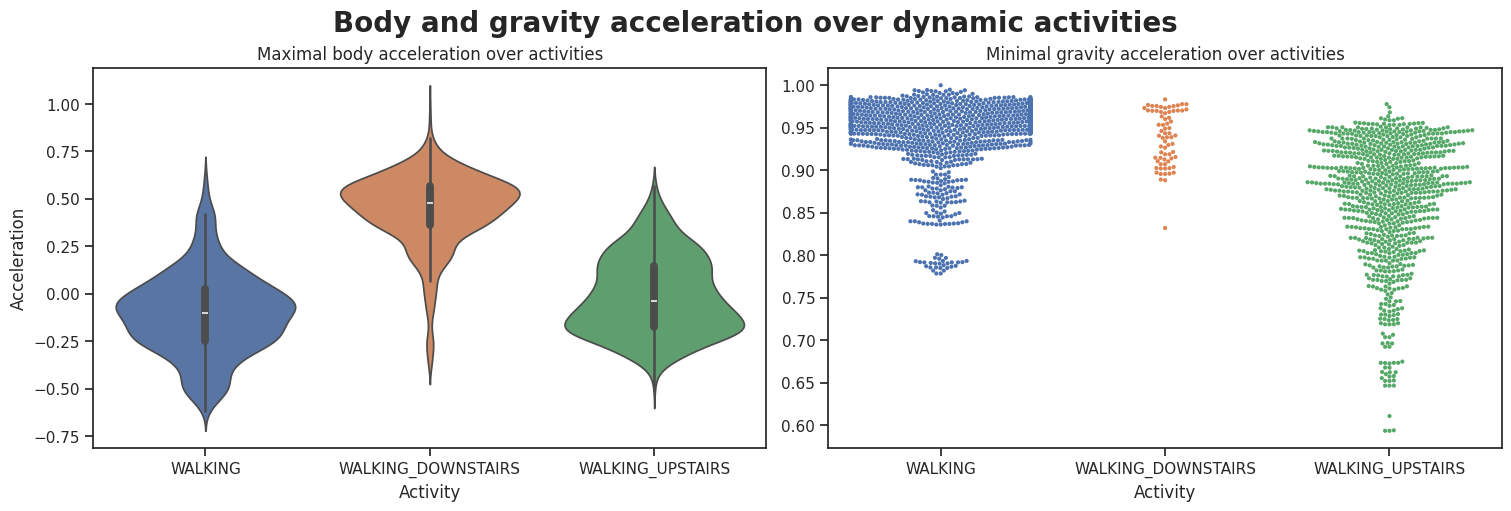

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), layout="compressed")

fig.suptitle('Body and gravity acceleration over dynamic activities', fontsize=20, fontweight='bold')

sns.violinplot(data=df_train_dynamic, x='Activity', y='tBodyAcc-max()-X', hue='Activity', ax=axes[0])
sns.swarmplot(data=df_train_dynamic[df_train_dynamic['tBodyAcc-max()-X'] < 0.157], x='Activity', y='tGravityAcc-min()-X', hue='Activity', ax=axes[1], s=3)

axes[0].set_title('Maximal body acceleration over activities')
axes[1].set_title('Minimal gravity acceleration over activities')
axes[0].set_ylabel('Acceleration')
axes[1].set_ylabel(None)

## Задание 15

Теперь попробуем более интерактивные графики. Установите библиотеку `plotly` (обычно `pip install plotly` или `conda install plotly`). Синтаксис очень похож на `seaborn`, но вот [документация для plotly.express](https://plotly.com/python-api-reference/plotly.express.html).

Сначала подготовим данные для визуализации. Будем считать t-SNE просто "черным ящиком", который принимает наши данные и проецирует их в двумерное или трехмерное пространство. Возможно, придется немного подождать.

In [39]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(random_state=666, n_components=2)
new = tsne.fit_transform(df_train.drop(['subject', 'Activity'], axis=1))
df_2_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y']),
    df_train['Activity']
], axis=1)

tsne = TSNE(random_state=666, n_components=3)
new = tsne.fit_transform(df_train.drop(['subject', 'Activity'], axis=1))
df_3_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y', 'z']),
    df_train['Activity']
], axis=1)

CPU times: user 6min 52s, sys: 674 ms, total: 6min 52s
Wall time: 4min 4s


Теперь нарисуйте scatter-график через `plotly.express` для `df_2_comp` с выделением цветами активностей. Красиво получилось? Видны скопления точек одного цвета? Можно разные активности отделить линиями на данном графике?

In [43]:
fig = px.scatter(df_2_comp, x="x", y="y", hover_data=['Activity'], color="Activity")
fig.update_layout(title_text='2D activities distribution')
fig.show()

Скопления точек определенно видны, активности можно отделить друг от друга линиями, но, на мой взгляд, некоторые активности (например, **стояние** и **сидение**), отделить будет достаточно тяжело, тогда как **лежание** - очень просто.

Мы не отстаем от трендов и тоже можем в 3D. Сейчас и вы научитесь (если еще не умеете). Нарисуйте scatter_3d-график через `plotly.express` для `df_3_comp` с выделением цветами активностей. Повращайте его. Нормально получилось? Есть ли какая-то структура у точек?

In [44]:
fig = px.scatter_3d(df_3_comp, x="x", y="y", z="z", hover_data=['Activity'], color="Activity")
fig.update_layout(title_text='3D activities distribution')
fig.show()

Структура у точек есть :)

Хотя, лично мне, немножко тяжелее в 3д, нежели в 2д.

## Задание 16

Мы сделали вам fit. Ваша очередь сделать predict. Допишите функцию, которая принимает на вход датафрейм с признаками, а выдает вектор из предсказаний - для каждой строки датафрейма вы определяете, к какому классу принадлежит объект. Рекомендуем сразу записывать из строками, а не кодировать в числа. Дальше фукнция `accuracy_score` выдаст вам долю правильных ответов.

Подсказка: вы уже отделили категории друг от друга по каким-то признакам. Воспользуйтесь этим знанием! Используя только проведенный вами анализ можно спокойно выбить не менее 75% на train и test! Если вы получите меньше 75%, то балл будет снижен. Авторское решение (на основе всех графиков выше) выбивает 81% и 77% на train и test соответственно. [Шапргалка с готовыми идеями для такой задачи](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

In [45]:
def predict(df: pd.DataFrame):
    pred = pd.Series('', index=np.arange(df.shape[0]))

    for index, row in df.iterrows():
        if row['tBodyAccMag-mean()'] < -0.556:
            if row['tGravityAcc-min()-X'] < 0 and row['angle(X,gravityMean)'] > -0:
                pred[index] = 'LAYING'
            elif row['angle(Y,gravityMean)'] >= 0.2 or (row['fBodyAcc-skewness()-X'] < -0.376 and row['angle(Y,gravityMean)'] > 0.11):
                pred[index] = 'STANDING'
            else:
                pred[index] = 'SITTING'
        else:
            if row['tBodyAcc-max()-X'] > 0.26:
                pred[index] = 'WALKING_DOWNSTAIRS'
            elif (row['tBodyAcc-max()-X'] < 0.132 and row['tGravityAcc-min()-X'] > 0.9) or (row['fBodyAcc-bandsEnergy()-1,8.2'] < -0.73 and row['fBodyAcc-skewness()-X'] < -0.13):
                pred[index] = 'WALKING'
            else:
                pred[index] = 'WALKING_UPSTAIRS'

    return pred

def accuracy_score(y_true, y_pred) -> float:
    y_true = np.asarray(y_true).reshape(-1, 1)
    y_pred = np.asarray(y_pred).reshape(-1, 1)
    return (y_true == y_pred).mean()

In [46]:
train_preds = predict(df_train)
test_preds = predict(df_test)
print(f"Accuracy on train set => {accuracy_score(df_train['Activity'], train_preds)}")
print(f"Accuracy on test set => {accuracy_score(df_test['Activity'], test_preds)}")

Accuracy on train set => 0.8256256800870512
Accuracy on test set => 0.8001357312521208


__Место для мема и/или фидбэка__

По моему субъективному мнению, датасет является не очень удачным для ознакомления студентов с анализом данных. Не говорю, что данные должны быть очень простыми, иначе все было бы и так понятно, мол, что толку делать какие-то модели, если и так все видно, но не настолько сложными. Лично я не понимал (и до сих пор не очень понимаю) термины из тех столбцов, над которыми нам было предложено поработать. `асимметричность частоты ускорения тела по оси Х` это ваще треш.

Большие непонятки до сих пор с углами гравитационной составляющей ускорения. Насколько я знаю (когда-то занимался физикой и даже на олимпиадки ездил), гравитацонное ускорение (оно же g) всегда направлено **вниз**. Если сказать точнее - по направлению к центру Земли, не провалиться под землю помогает сила реакции опоры, которая по величине ускорения равна гравитации. Реакция опоры всегда направлена строго **вверх**. В связи с этим я не совсем до конца понял, что значат углы между координатами и гравитационной составляющей ускорения. Если последнее всегда направлено вниз, то значит и углы всегда одинаковые, а в датасете они разные.

Короче может я просто тупой, но для меня это странно))

Самое забавное, что не то что ассистенты, а сам человек, который нашел этот датасет и вставил его в это дз (как я понял), не смог адекватно объяснить что значат величины.

Проблемы бы не было, если бы в некоторых заданиях нас не просили построить какие-то доводы на основе взаимоотношения некоторых признаков (т.к. это наталкивает на построение логических связей, а строить их очень тяжело, когда не понимаешь о чем вообще идет речь).

Учитывая мои впечатления от проделанной работы, хотел бы попросить дать ребятам в следующем году немного более интуитивно понятный датасет))